In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv("data/customer_acquisition_data.csv", index_col='customer_id')
data.head()

,channel,cost,conversion_rate,revenue
customer_id,,,,
1,referral,8.320327,0.123145,4199
2,paid advertising,30.450327,0.016341,3410
3,email marketing,5.246263,0.043822,3164
4,social media,9.546326,0.167592,1520
5,referral,8.320327,0.123145,2419


In [3]:
data.shape

(800, 4)

In [4]:
cnt_users = data.shape[0]
cnt_users

800

In [5]:
df_users = data['channel'].value_counts().reset_index()
df_users

,channel,count
0,email marketing,214
1,referral,207
2,paid advertising,194
3,social media,185


In [6]:
df_mean = data.groupby('channel')[['cost', 'conversion_rate', 'revenue']].mean().reset_index()
df_mean.columns = ['channel', 'mean_cost', 'mean_conversion_rate', 'mean_revenue'] 
df_mean

,channel,mean_cost,mean_conversion_rate,mean_revenue
0,email marketing,5.246263,0.043822,2825.728972
1,paid advertising,30.450327,0.016341,2826.783505
2,referral,8.320327,0.123145,2751.458937
3,social media,9.546326,0.167592,2663.064865


In [68]:
df_total = data.groupby('channel')[['cost', 'conversion_rate', 'revenue']].sum().reset_index()
df_total = df_users.merge(df_total, how='inner', on='channel')
df_total.columns = ['channel', 'total_users', 'total_cost', 'total_conversion_rate', 'total_revenue']
df = df_total.merge(df_mean, how='inner', on='channel')
df

,channel,total_users,total_cost,total_conversion_rate,total_revenue,mean_cost,mean_conversion_rate,mean_revenue
0,email marketing,214,1122.700340,9.377957,604706,5.246263,0.043822,2825.728972
1,referral,207,1722.307634,25.491011,569552,8.320327,0.123145,2751.458937
2,paid advertising,194,5907.363479,3.170249,548396,30.450327,0.016341,2826.783505
3,social media,185,1766.070249,31.004566,492667,9.546326,0.167592,2663.064865


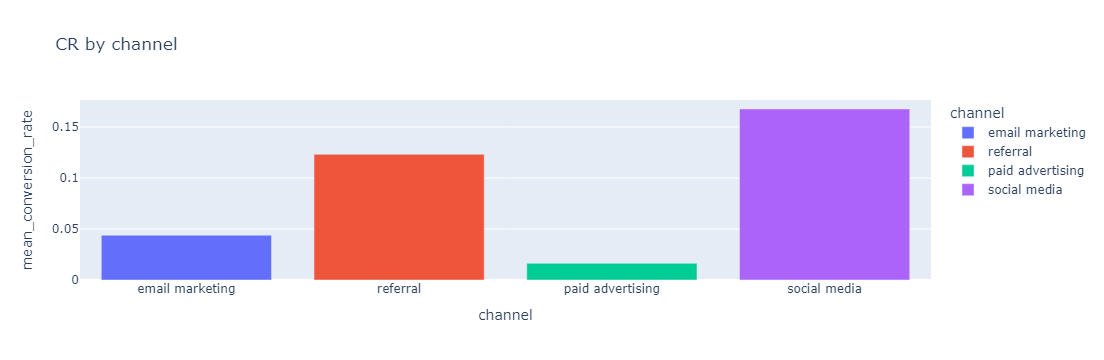

In [67]:
px.bar(data_frame = df, x='channel', y = 'mean_conversion_rate', color = 'channel', title = 'CR by channel')

### Соціальні мережі є найефективнішим каналом для перетворення клієнтів, тоді як платна реклама є найменш ефективною

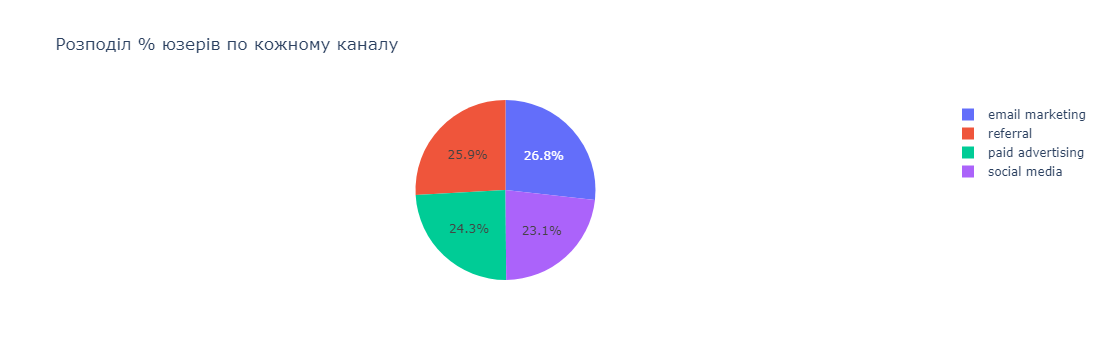

In [37]:
px.pie(df_users, names='channel', values='count', title = 'Розподіл % юзерів по кожному каналу')

### Юзерів надійшло найбільше з електроної пошти. В цілому майже рівномірно розподілені 

### Розподіл доходу 

In [38]:
df_rev = data.groupby('channel')['revenue'].sum().reset_index()
df_rev

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


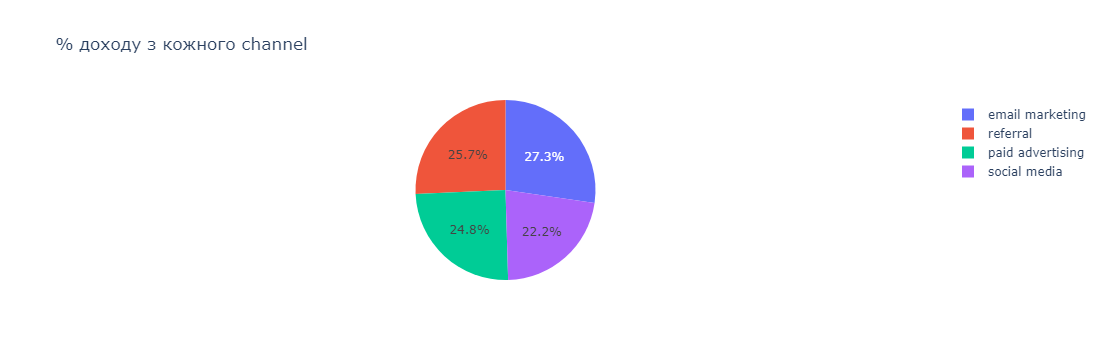

In [41]:
px.pie(data_frame=df_rev, values='revenue', names='channel', title = '% доходу з кожного channel')

### Електронний маркетинг є найприбутковішим каналом з точки зору отримання доходу. Але немає великої різниці між відсотками отримання прибутку від усіх каналів, щоб назвати будь-який канал найменш прибутковим.

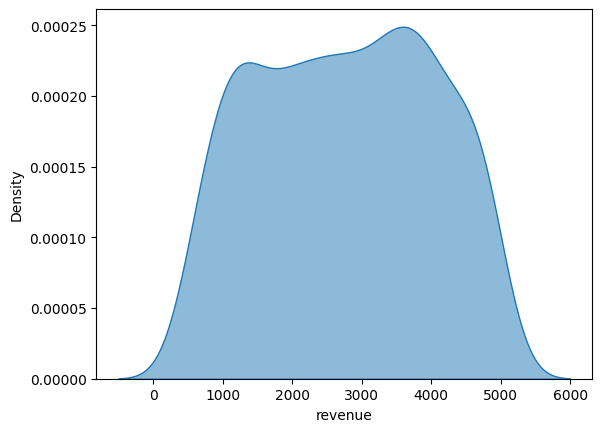

In [8]:
sns.kdeplot(data=data, x='revenue', fill=True, alpha=0.5);

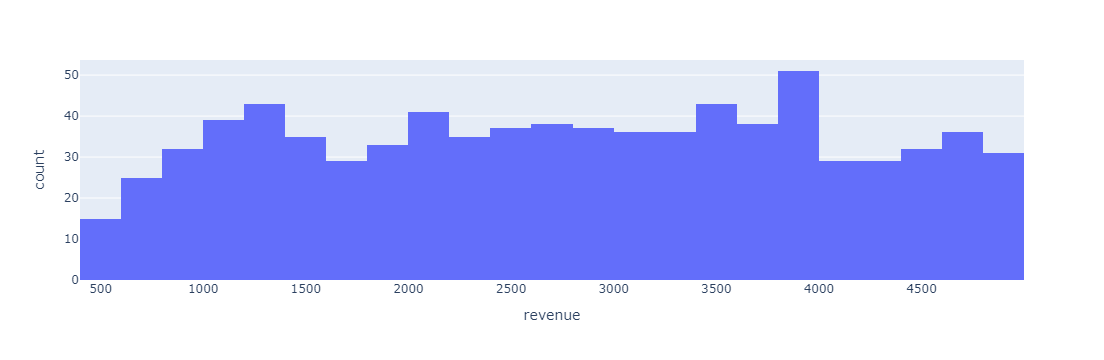

In [9]:
px.histogram(data_frame = data, x='revenue')

### Розподіл витрат

In [43]:
df_cost = data.groupby('channel')['cost'].sum().reset_index()
df_cost

,channel,cost
0,email marketing,1122.700340
1,paid advertising,5907.363479
2,referral,1722.307634
3,social media,1766.070249


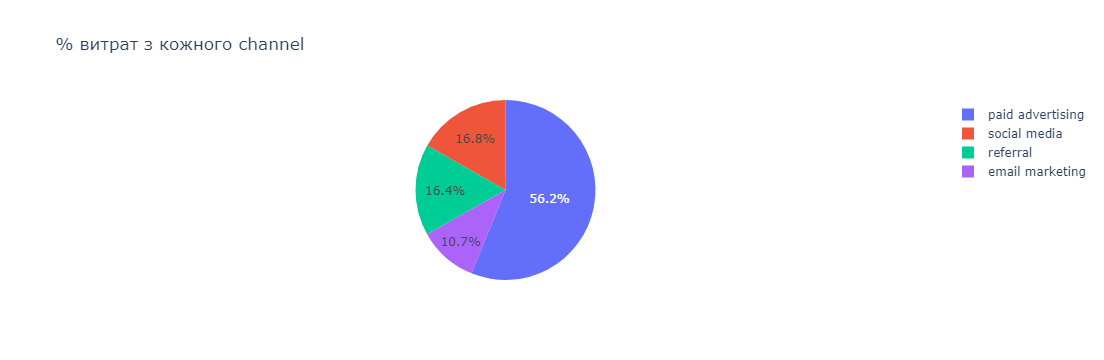

In [44]:
px.pie(data_frame=df_cost, values='cost', names='channel', title = '% витрат з кожного channel')

### Найбільше витрачається на платну рекламу

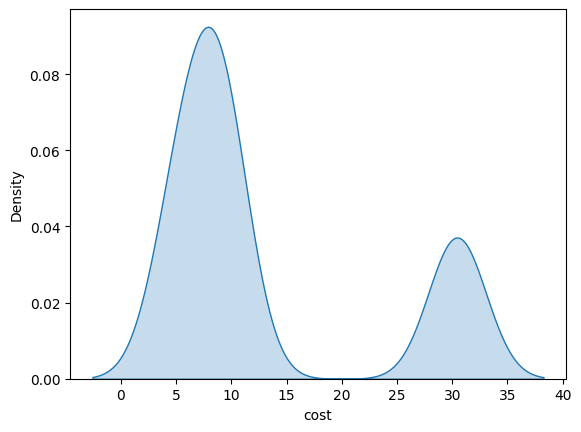

In [10]:
sns.kdeplot(data=data, x='cost', fill='True');

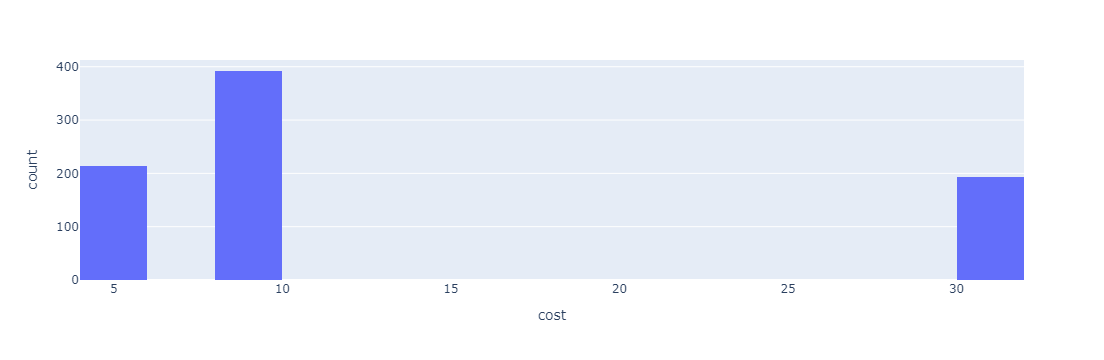

In [11]:
px.histogram(data_frame = data, x='cost')

# Total

In [12]:
df_total = data.groupby('channel')[['cost', 'conversion_rate', 'revenue']].sum().reset_index()
df_total

,channel,cost,conversion_rate,revenue
0,email marketing,1122.700340,9.377957,604706
1,paid advertising,5907.363479,3.170249,548396
2,referral,1722.307634,25.491011,569552
3,social media,1766.070249,31.004566,492667


In [21]:
df['net_revenue'] = round(df['total_revenue'] - df['total_cost'], 2)
df['cac'] = round(df['total_cost'] / df['total_users'], 2)
df['roi'] = round((df['total_revenue'] - df['total_cost']) / df['total_cost'], 2)
df

,channel,total_users,total_cost,total_conversion_rate,total_revenue,mean_cost,mean_conversion_rate,mean_revenue,net_revenue,cac,roi,cltv
0,email marketing,214,1122.700340,9.377957,604706,5.246263,0.043822,2825.728972,603583.30,5.25,537.62,23.56
1,referral,207,1722.307634,25.491011,569552,8.320327,0.123145,2751.458937,567829.69,8.32,329.69,40.60
2,paid advertising,194,5907.363479,3.170249,548396,30.450327,0.016341,2826.783505,542488.64,30.45,91.83,1.50
3,social media,185,1766.070249,31.004566,492667,9.546326,0.167592,2663.064865,490900.93,9.55,277.96,46.58


In [22]:
df['cltv'] = round(((df['net_revenue']) * df['mean_conversion_rate']) / df['total_cost'], 2)
df

,channel,total_users,total_cost,total_conversion_rate,total_revenue,mean_cost,mean_conversion_rate,mean_revenue,net_revenue,cac,roi,cltv
0,email marketing,214,1122.700340,9.377957,604706,5.246263,0.043822,2825.728972,603583.30,5.25,537.62,23.56
1,referral,207,1722.307634,25.491011,569552,8.320327,0.123145,2751.458937,567829.69,8.32,329.69,40.60
2,paid advertising,194,5907.363479,3.170249,548396,30.450327,0.016341,2826.783505,542488.64,30.45,91.83,1.50
3,social media,185,1766.070249,31.004566,492667,9.546326,0.167592,2663.064865,490900.93,9.55,277.96,46.58


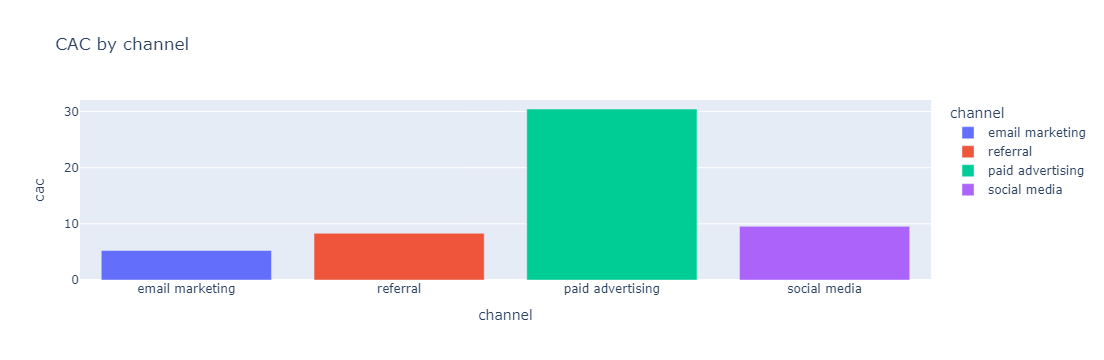

In [31]:
px.bar(data_frame = df, x='channel', y = 'cac', color = 'channel', title = 'CAC by channel')

### CAC платної реклами набагато вища, ніж у всіх інших каналів, тоді як CAC електронної пошти є найнижчим

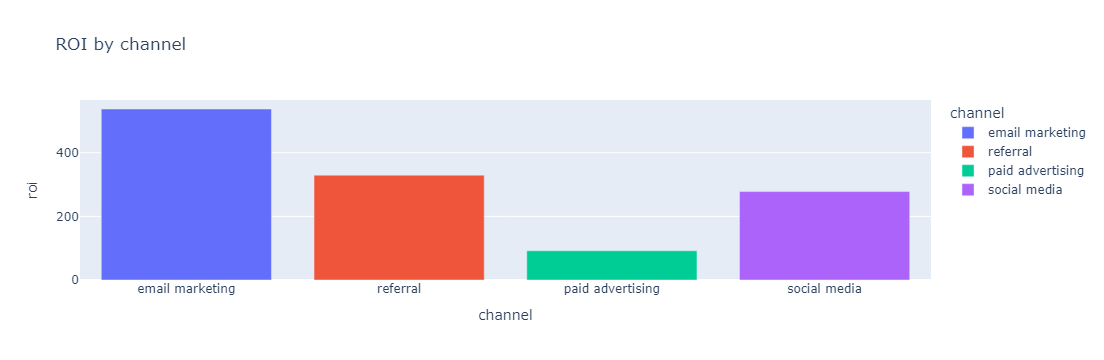

In [36]:
px.bar(data_frame = df, x='channel', y = 'roi', color = 'channel', title = 'ROI by channel')

### ROI електронною поштою набагато вища, ніж у всіх інших каналів, тоді як ROI від платної реклами є найнижчою

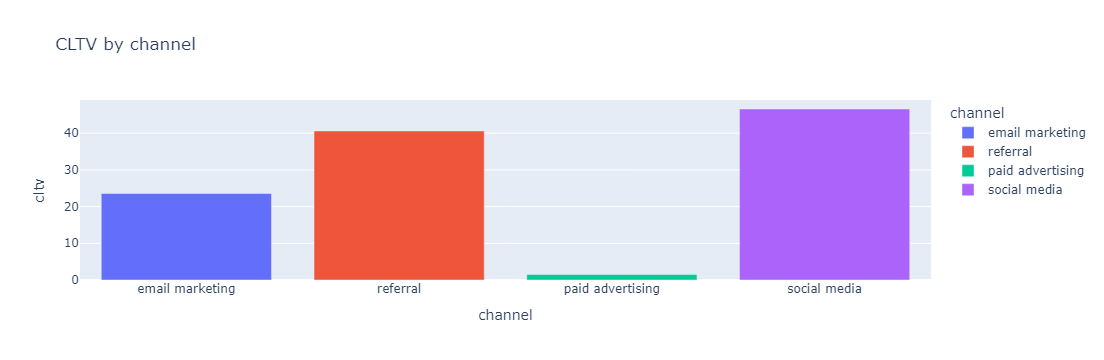

In [33]:
px.bar(data_frame = df, x='channel', y = 'cltv', color = 'channel', title = 'CLTV by channel')

### Цінність клієнта в соціальних мережах і реферальних каналах є найвищою

In [66]:
data['cltv'] = ((data['revenue'] - data['cost']) * data['conversion_rate']) / data['cost']
data['cltv'].head()

customer_id
1    62.024146
2     1.813671
3    26.385185
4    26.517043
5    35.679260
Name: cltv, dtype: float64

In [61]:
data[['channel', 'cltv']].groupby('channel').describe()

cltv                                                        \
                  count       mean        std       min        25%        50%   
channel                                                                         
email marketing   214.0  23.559595  10.175615  4.132696  15.459414  24.205043   
paid advertising  194.0   1.500682   0.698495  0.257355   0.877735   1.493822   
referral          207.0  40.599817  18.355860  7.277104  23.927664  40.578224   
social media      185.0  46.584325  22.572812  8.943806  26.148373  45.354288   

                                        
                        75%        max  
channel                                 
email marketing   30.707882  41.353827  
paid advertising   2.078111   2.665888  
referral          55.696933  73.790542  
social media      68.334675  86.417026

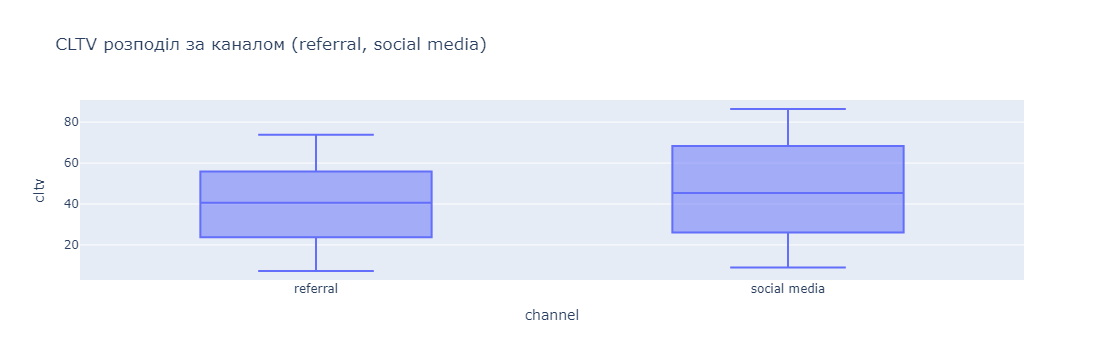

In [65]:
px.box(data.loc[data['channel'].isin(['social media', 'referral'])], x='channel', y='cltv', title='CLTV розподіл за каналом (referral, social media)')

### Немає великої різниці, але довгострокова цінність клієнта з каналу соціальних мереж трохи краща, ніж каналу рекомендацій